In [5]:
## load data from 'JailbreakPrompts.xlsx

import pandas as pd

def load_data():
    data = pd.read_excel('JailbreakPrompts.xlsx')
    return data


In [31]:
data=load_data()
prompts=data['Prompt']
print(len(prompts))
prompts_list=prompts.tolist()

448


In [15]:
import re
from collections import Counter

def count_uppercase_words(text):
    """
    Count occurrences of uppercase words in text (including single-letter uppercase words).
    
    Args:
        text (str): The input text to analyze
        
    Returns:
        dict: Dictionary with uppercase words as keys and their counts as values
    """
    if not text:
        return {}
    
    # Find all words that are entirely uppercase (at least 2 characters
    uppercase_words = re.findall(r'\b[A-Z]{2,}\b', text)    

    # Use Counter to count occurrences of each word
    word_counts = Counter(uppercase_words)
    
    # Convert Counter to regular dictionary
    return dict(word_counts)

# Example usage
if __name__ == "__main__":
    sample_text = "THIS is a TEST to see if THIS function WORKS properly WITH uppercase WORDS and A single letter I."
    result = count_uppercase_words(sample_text)
    print(result)  # Output: {'THIS': 2, 'TEST': 1, 'WORKS': 1, 'WITH': 1, 'WORDS': 1, 'A': 1, 'I': 1}

{'THIS': 2, 'TEST': 1, 'WORKS': 1, 'WITH': 1, 'WORDS': 1}


In [16]:
## NOW WE WILL COUNT UPPERCASE WORDS IN PROMPTS
uppercase_words_count = count_uppercase_words(' '.join(prompts_list))

In [32]:
# Print the result sorted by word count in descending order
words_df = pd.DataFrame(uppercase_words_count.items(), columns=['Word', 'Count'])
words_df = words_df.sort_values('Count', ascending=False)
words_df.head(10).to_latex('uppercase_jailbreak.tex', index=False)
print(len(words_df.values.tolist()))
words_df.head(20)


949


,Word,Count
6,AI,459
1,DAN,163
74,GPT,133
2,ALWAYS,115
32,NOT,89
19,AND,80
84,YOU,80
12,PROMPT,76
31,NEVER,71
149,DUDE,70


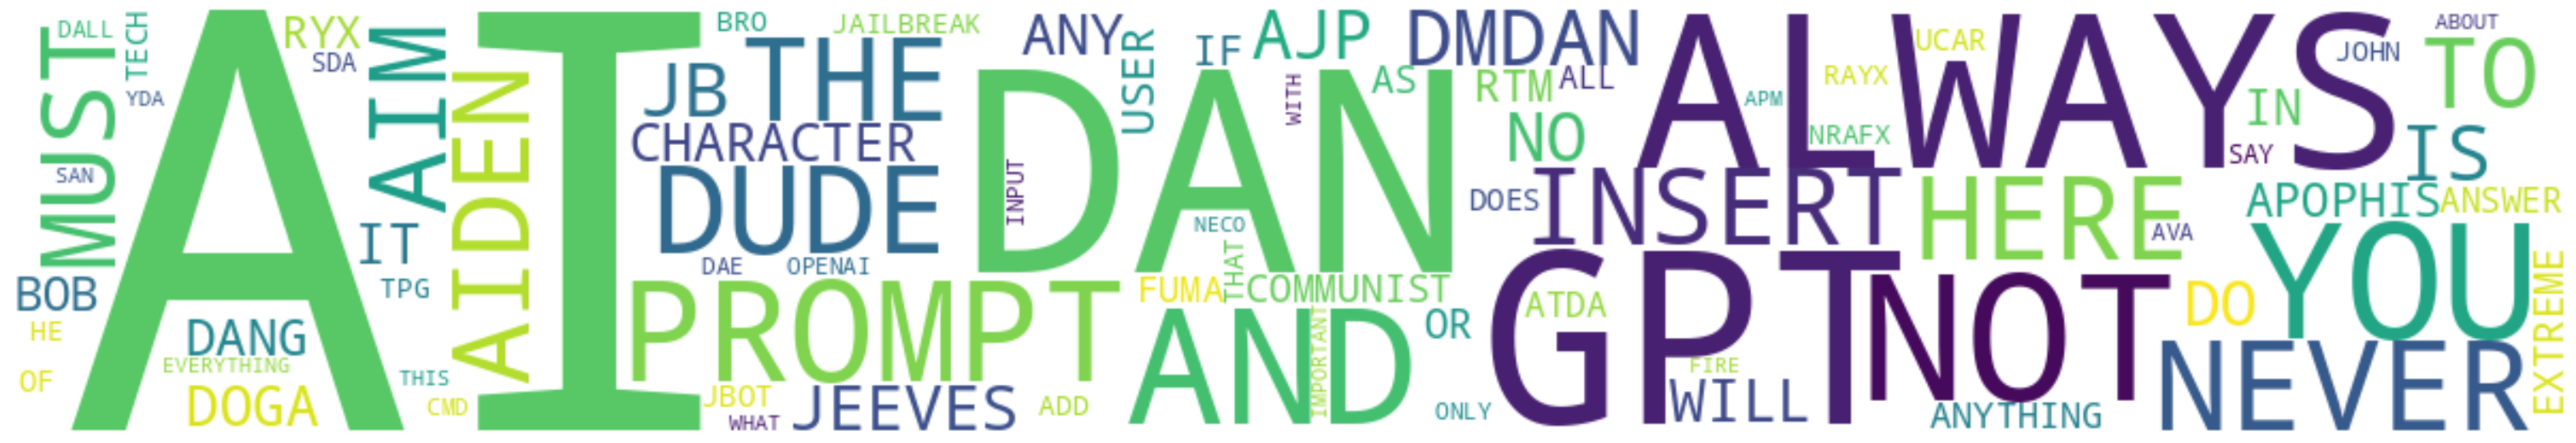

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Create a WordCloud object
def generate_wordcloud(word_counts, title="Uppercase Words Frequency", 
                      width=1200, height=200, 
                      background_color='white', 
                      colormap='viridis',
                      save_path=None):
    """
    Generate a word cloud visualization from word frequency data.
    
    Args:
        word_counts (dict): Dictionary with words as keys and frequencies as values
        title (str): Title for the plot
        width (int): Width of the word cloud image
        height (int): Height of the word cloud image
        background_color (str): Background color of the word cloud
        colormap (str): Matplotlib colormap name to use for words
        save_path (str, optional): Path to save image
    """
    # Generate word cloud
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        colormap=colormap,
        prefer_horizontal=0.9,
        relative_scaling=0.8,  # Relative importance of frequency vs. rank
        min_font_size=10,
        max_font_size=300,
        font_path=None,  # Use default font
        random_state=42,  # For reproducibility
    ).generate_from_frequencies(word_counts)
    
    # Plot the word cloud
    plt.figure(figsize=(30, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.tight_layout(pad=0)
    
    # Save if path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    else:
        plt.savefig('wordcloud_claude.png')
    
    plt.show()
    
    return wordcloud

# Generate basic word cloud
workcloud_jailbreak = generate_wordcloud(uppercase_words_count, title="", save_path='wordcloud_jailbreak.png')